# Zhetessov Nur M.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, InputLayer, BatchNormalization, Activation
from tensorflow.keras import activations
from tensorflow.keras import losses
from keras.optimizers import RMSprop, SGD, Adam
import tensorflow as tf
import numpy as np

In [2]:
names = ["Akhmedov Sanzhar", "Alikhan Zhamankhan", "Baibatchayeva Anar", "Dalabay Abylay", "Daniyar Raiymbekov", "Duisenov Alikhan", "Kenzhebay Askar", "Kyran Yerkin", "Maxat Ualikhan", "Naryshov Ernar", "Rysmambetov Nurtugan", "Sagynbek Nurbolat", "Zhetessov Nur", "Zhumabekov Magjan"] 
people = {
    "Akhmedov Sanzhar": 0,
    "Alikhan Zhamankhan": 1,
    "Baibatchayeva Anar": 2,
    "Dalabay Abylay": 3,
    "Daniyar Raiymbekov": 4,
    "Duisenov Alikhan": 5,
    "Kenzhebay Askar": 6,
    "Kyran Yerkin": 7,
    "Maxat Ualikhan": 8,
    "Naryshov Ernar": 9,
    "Rysmambetov Nurtugan": 10,
    "Sagynbek Nurbolat": 11,
    "Zhetessov Nur": 12,
    "Zhumabekov Magjan": 13
}

## Cascade

In [3]:
face_cascade = cv2.CascadeClassifier('DATA/cascades/haarcascade_frontalface_default.xml')

## Detects face

In [4]:
def detect(img):
    
    face_img = img.copy()
    face_img = cv2.cvtColor(face_img, cv2.COLOR_BGR2GRAY)
    
    face_rects = []
    
    face_rects = face_cascade.detectMultiScale(face_img, scaleFactor=1.2, minNeighbors=5)
    
    #coordinates = []
    
    #coordinates.append(face_rects)
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (0, 255, 0), 2)
        
    #for i in coordinates:
    #    for (x,y,w,h) in i[0]:#sorted(nose,key=lambda x: x[2]*x[3],reverse=True)[:1]:
    #        #print(x,y)
    #        cv2.rectangle(face_img, (x,y), (x+w,y+h), (0, 255, 0), 2)
    
    return face_rects

## Prepare Data (#deprecated)

In [5]:
def prepare_training_faces():
    root = "C:/Users/Nur/Documents/Programming/2 SEMESTER/3 year/CV/Practice 4/06-Deep-Learning-Computer-Vision/06-Deep-Learning-Computer-Vision/DATA/cropped_faces"
    folders = os.listdir(root)
    #faces = []
    #labels = []
    for folder in folders:
        #label = people.get(folder)

        images = os.listdir(root + "/" + folder)
        for img_name in images:
            image = cv2.imread(root + "/" + folder + "/" + img_name)
            #rec = detect(image)
            #if(len(rec)):
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.convertScaleAbs(image, beta=5)
            #image = cv2.resize(image, (128, 128), interpolation = cv2.INTER_AREA)
            #image = image / 255
            #faces.append(image)
            #labels.append(label)
            #cv2.imwrite(root+"/"+img_name, image[rec[0]:rec[0]+rec[2],rec[1]:rec[1]+rec[3]])
            cv2.imwrite(root + "/" + folder + "/" + str(datetime.now()))
    
    return faces, labels

In [6]:
#faces, labels = prepare_training_faces()

In [7]:
#plt.imshow(faces[0])

In [8]:
#faces[0].shape

In [9]:
#faces = np.array(faces)
#labels = np.array(labels)
#faces

## ImageGenerator

In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
image_gen = ImageDataGenerator(#featurewise_center=True,
                                #featurewise_std_noralization=True,
                                brightness_range=[0.1, 1.5],
                                rotation_range=5, # rotate the image 30 degrees
                                width_shift_range=0.1, # Shift the pic width by a max of 10%
                                height_shift_range=0.1, # Shift the pic height by a max of 10%
                                rescale=1./255, # Rescale the image by normalzing it.
                                shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                                zoom_range=0.3, # Zoom in by 20% max
                                horizontal_flip=True, # Allow horizontal flipping
                                fill_mode='nearest', # Fill in missing pixels with the nearest filled value
                                validation_split=0.3
                              )

In [12]:
img = plt.imread('DATA/cropped_faces/Zhetessov Nur/WIN_20230329_10_21_28_Pro (2).jpg')

In [13]:
p = image_gen.random_transform(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


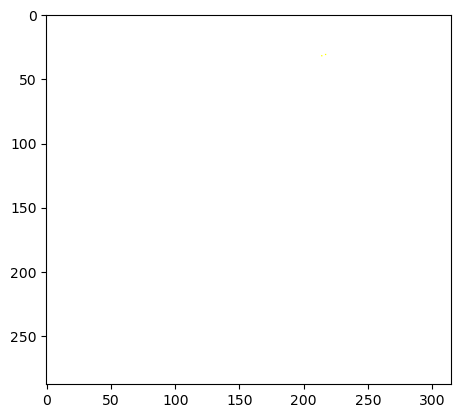

In [14]:
plt.imshow(p)

In [15]:
image_gen.flow_from_directory('DATA/faces/', save_to_dir = 'DATA/cropped_faces/', save_format = 'jpg')

Found 700 images belonging to 14 classes.


## Labels

In [16]:
#labels

In [17]:
#from keras.utils import to_categorical

In [18]:
#labels = to_categorical(labels, 7)

In [19]:
#labels

## Train Test Split

In [20]:
#from sklearn.model_selection import train_test_split

In [21]:
#idx = np.random.permutation(len(faces))

In [22]:
#X, y = faces[idx], labels[idx]

In [23]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
image_shape = (227,227,3)

In [25]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory(
                                                    'DATA/cropped_faces/',
                                                    target_size=image_shape[:2],
                                                    color_mode="rgb",
                                                    shuffle=True,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    subset='training',
                                                    save_to_dir = 'DATA/cropped_modified/',
                                                    save_format = 'jpg'
                                               )

Found 496 images belonging to 14 classes.


In [26]:
validation_image_gen = image_gen.flow_from_directory(
                                                    'DATA/cropped_faces/',
                                                    target_size=image_shape[:2],
                                                    color_mode="rgb",
                                                    shuffle=True,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    subset='validation'
                                                    )

Found 202 images belonging to 14 classes.


In [27]:
train_image_gen.class_indices

{'Akhmedov Sanzhar': 0,
 'Alikhan Zhamankhan': 1,
 'Baibatchayeva Anar': 2,
 'Dalabay Abylay': 3,
 'Daniyar Raiymbekov': 4,
 'Duisenov Alikhan': 5,
 'Kenzhebay Askar': 6,
 'Kyran Yerkin': 7,
 'Maxat Ualikhan': 8,
 'Naryshov Ernar': 9,
 'Rysmambetov Nurtugan': 10,
 'Sagynbek Nurbolat': 11,
 'Zhetessov Nur': 12,
 'Zhumabekov Magjan': 13}

## Building the Model

In [28]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [29]:
model = Sequential()

In [30]:
model.add(InputLayer(input_shape=image_shape))

# 1 CONVOLUTIONAL LAYER
model.add(Conv2D(filters=96, kernel_size=(11,11)))
model.add(BatchNormalization())
model.add(Activation(activation=activations.swish))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(3, 3)))

# 2 CONVOLUTIONAL LAYER
model.add(Conv2D(filters=256, kernel_size=(5,5)))
model.add(BatchNormalization())
model.add(Activation(activation=activations.swish))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(3, 3)))

# 3 CONVOLUTIONAL LAYER
model.add(Conv2D(filters=384, kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation(activation=activations.swish))

# 4 CONVOLUTIONAL LAYER
model.add(Conv2D(filters=384, kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation(activation=activations.swish))

# 5 CONVOLUTIONAL LAYER
model.add(Conv2D(filters=256, kernel_size=(3,3))) #padding="same" strides=(1, 1)
model.add(BatchNormalization())
model.add(Activation(activation=activations.swish))


model.add(MaxPool2D(pool_size=(3, 3)))


model.add(Flatten())

model.add(Dense(512, activation='swish'))

model.add(Dense(256, activation='swish'))

model.add(Dense(14, activation='softmax'))

In [31]:
model.compile(loss = losses.CategoricalCrossentropy(),
              optimizer = Adam(learning_rate=0.0003),
              metrics = ['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 217, 217, 96)      34944     
                                                                 
 batch_normalization (BatchN  (None, 217, 217, 96)     384       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 217, 217, 96)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 72, 72, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 68, 68, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 68, 68, 256)      1

In [33]:
#model.fit(X_train,y_train,verbose=1,epochs=10)

## Training

In [34]:
results = model.fit(train_image_gen, epochs=100,
                              steps_per_epoch=31,
                              validation_data=validation_image_gen,
                             validation_steps=12)

Epoch 1/100
31/31 [==============================] - 138s 4s/step - loss: 10.6450 - accuracy: 0.0726 - val_loss: 1612.6322 - val_accuracy: 0.0833
Epoch 2/100
31/31 [==============================] - 121s 4s/step - loss: 3.1404 - accuracy: 0.1089 - val_loss: 23.4199 - val_accuracy: 0.0938
Epoch 3/100
31/31 [==============================] - 119s 4s/step - loss: 2.7234 - accuracy: 0.1371 - val_loss: 8.8500 - val_accuracy: 0.0885
Epoch 4/100
31/31 [==============================] - 124s 4s/step - loss: 2.5138 - accuracy: 0.1673 - val_loss: 3.5514 - val_accuracy: 0.1094
Epoch 5/100
31/31 [==============================] - 129s 4s/step - loss: 2.5333 - accuracy: 0.1754 - val_loss: 2.8626 - val_accuracy: 0.0781
Epoch 6/100
31/31 [==============================] - 130s 4s/step - loss: 2.4072 - accuracy: 0.1976 - val_loss: 2.8526 - val_accuracy: 0.1250
Epoch 7/100
31/31 [==============================] - 129s 4s/step - loss: 2.3433 - accuracy: 0.2198 - val_loss: 2.7309 - val_accuracy: 0.1042
E

### Accuracy

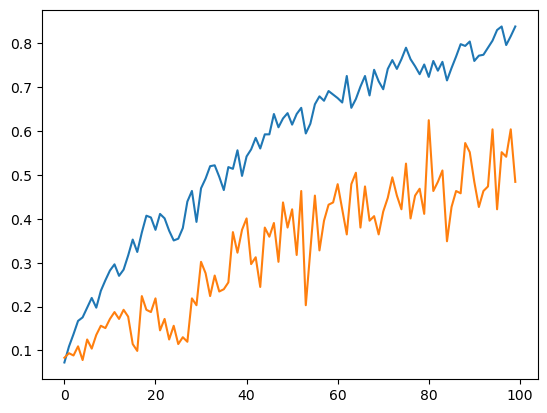

In [35]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.show()

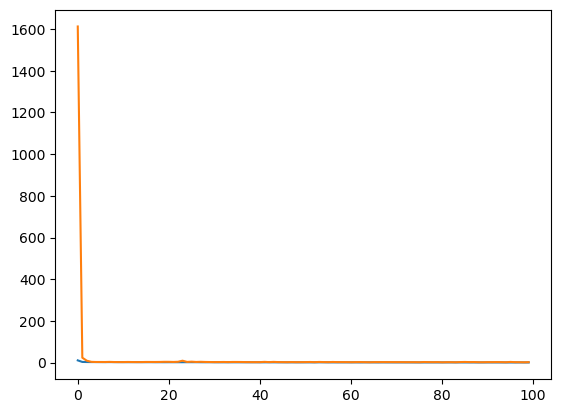

In [36]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss']) 
plt.show()

### Saving model

In [37]:
#model.save('m10_cropped-augmentation-100epochs-BatchNormalization-Swish.h5')

## Normalize

In [38]:
def normalize(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (227, 227), interpolation = cv2.INTER_AREA)
    image = np.expand_dims(image, axis=0)
    image = image / 255
    return image

## Model evaluation

In [39]:
train_image_gen.class_indices

{'Akhmedov Sanzhar': 0,
 'Alikhan Zhamankhan': 1,
 'Baibatchayeva Anar': 2,
 'Dalabay Abylay': 3,
 'Daniyar Raiymbekov': 4,
 'Duisenov Alikhan': 5,
 'Kenzhebay Askar': 6,
 'Kyran Yerkin': 7,
 'Maxat Ualikhan': 8,
 'Naryshov Ernar': 9,
 'Rysmambetov Nurtugan': 10,
 'Sagynbek Nurbolat': 11,
 'Zhetessov Nur': 12,
 'Zhumabekov Magjan': 13}

In [40]:
#img = plt.imread('DATA/faces_test/Zhumabekov Magjan/1.jpg')
#img = normalize(img)
#print(img.shape)
#plt.imshow(img)

In [41]:
root = "C:/Users/Nur/Documents/Programming/2 SEMESTER/3 year/CV/Practice 4/06-Deep-Learning-Computer-Vision/06-Deep-Learning-Computer-Vision/DATA/cropped_test"
folder = os.listdir(root)
faces = []
labels = []
prediction = []
for img_name in folder:
    image = cv2.imread(root + "/" + img_name)
    print(img_name)
    image = normalize(image)
    pred_index = np.argmax(model.predict(image), axis=1)[0]
    faces.append(image)
    labels.append(int(img_name.split('.')[0]))
    prediction.append(pred_index)
    #cv2.imwrite(root+"/"+img_name, image[rec[0]:rec[0]+rec[2],rec[1]:rec[1]+rec[3]])

0.jpg
1/1 [==============================] - 1s 766ms/step
1.jpg
1/1 [==============================] - 0s 118ms/step
10.jpg
1/1 [==============================] - 0s 106ms/step
11.jpg
1/1 [==============================] - 0s 87ms/step
12.jpg
1/1 [==============================] - 0s 109ms/step
13.jpg
1/1 [==============================] - 0s 97ms/step
2.jpg
1/1 [==============================] - 0s 105ms/step
3.jpg
1/1 [==============================] - 0s 129ms/step
4.jpg
1/1 [==============================] - 0s 105ms/step
5.jpg
1/1 [==============================] - 0s 103ms/step
6.jpg
1/1 [==============================] - 0s 134ms/step
7.jpg
1/1 [==============================] - 0s 128ms/step
8.jpg
1/1 [==============================] - 0s 104ms/step
9.jpg
1/1 [==============================] - 0s 112ms/step


In [42]:
labels

[0, 1, 10, 11, 12, 13, 2, 3, 4, 5, 6, 7, 8, 9]

In [43]:
prediction

[0, 12, 10, 11, 12, 13, 2, 8, 4, 5, 6, 7, 8, 9]

In [44]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(labels, prediction))

0.8571428571428571


In [45]:
print(classification_report(labels, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.50      1.00      0.67         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       0.50      1.00      0.67         1
          13       1.00      1.00      1.00         1

    accuracy                           0.86        14
   macro avg       0.79      0.86      0.81        14
weighted avg       0.79      0.86      0.81        14



C:\Users\Nur\.conda\envs\python-cvcourse\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nur\.conda\envs\python-cvcourse\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nur\.conda\envs\python-cvcourse\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [95]:
testing = cv2.imread('DATA/cropped_test/photo_5314645167350858849_y.jpg')

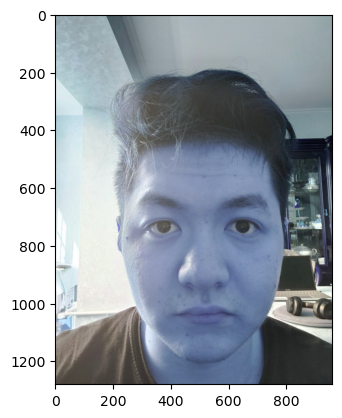

In [96]:
plt.imshow(testing)

In [97]:
rec = detect(testing)

In [98]:
rec

array([[146, 442, 721, 721]])

In [99]:
(x, y, w, h) = tuple(map(int, rec[0]))
p1 = (x, y)
p2 = (x+w, y+h)
cv2.rectangle(testing, p1, p2, (0,255,0), 3)
a_face = normalize(frame[y:y+h, x:x+w])
pred = model.predict(a_face, verbose=0)
pred_i = np.argmax(pred, axis=1)[0]

[[4.3004238e-05 1.8369841e-06 9.9537462e-01 1.3652416e-03 1.0748199e-03
  1.5307683e-05 6.1716128e-04 2.7175783e-04 4.6586490e-04 3.8889179e-06
  2.5615274e-04 1.1511061e-05 5.9739414e-05 4.3914150e-04]]


In [93]:
pred_i

2

In [94]:
names[pred_i]

'Baibatchayeva Anar'

array([[4.30042386e-01, 1.83698405e-02, 9.95374609e+03, 1.36524162e+01,
        1.07481995e+01, 1.53076828e-01, 6.17161274e+00, 2.71757841e+00,
        4.65864897e+00, 3.88891809e-02, 2.56152725e+00, 1.15110606e-01,
        5.97394109e-01, 4.39141512e+00]], dtype=float32)

# Testing

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.optimizers import RMSprop, SGD
import tensorflow as tf
import numpy as np

In [2]:
names = ["Akhmedov Sanzhar", "Alikhan Zhamankhan", "Baibatchayeva Anar", "Dalabay Abylay", "Daniyar Raiymbekov", "Duisenov Alikhan", "Kenzhebay Askar", "Kyran Yerkin", "Maxat Ualikhan", "Naryshov Ernar", "Rysmambetov Nurtugan", "Sagynbek Nurbolat", "Zhetessov Nur", "Zhumabekov Magjan"] 

people = {
    "Akhmedov Sanzhar": 0,
    "Alikhan Zhamankhan": 1,
    "Baibatchayeva Anar": 2,
    "Dalabay Abylay": 3,
    "Daniyar Raiymbekov": 4,
    "Duisenov Alikhan": 5,
    "Kenzhebay Askar": 6,
    "Kyran Yerkin": 7,
    "Maxat Ualikhan": 8,
    "Naryshov Ernar": 9,
    "Rysmambetov Nurtugan": 10,
    "Sagynbek Nurbolat": 11,
    "Zhetessov Nur": 12,
    "Zhumabekov Magjan": 13
}

## Cascade

In [3]:
face_cascade = cv2.CascadeClassifier('DATA/cascades/haarcascade_frontalface_default.xml')

## Detects face

In [4]:
def detect(img):
    
    face_img = img.copy()
    face_img = cv2.cvtColor(face_img, cv2.COLOR_BGR2GRAY)
    
    face_rects = []
    
    face_rects = face_cascade.detectMultiScale(face_img, scaleFactor=1.2, minNeighbors=5)
    
    #coordinates = []
    
    #coordinates.append(face_rects)
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (0, 255, 0), 2)
        
    #for i in coordinates:
    #    for (x,y,w,h) in i[0]:#sorted(nose,key=lambda x: x[2]*x[3],reverse=True)[:1]:
    #        #print(x,y)
    #        cv2.rectangle(face_img, (x,y), (x+w,y+h), (0, 255, 0), 2)
    
    return face_rects

## Normalize

In [5]:
def normalize(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (227, 227), interpolation = cv2.INTER_AREA)
    #image = cv2.resize(image, (150, 150), interpolation = cv2.INTER_AREA)
    image = np.expand_dims(image, axis=0)
    image = image / 255
    return image

In [6]:
from keras.models import load_model
model = load_model('m11_cropped-augmentation-135epochs (1).h5')

In [8]:
cap = cv2.VideoCapture(0)

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
 
#out = cv2.VideoWriter('outpy.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 15, (frame_width,frame_height))

#ret, frame = cap.read() #READING FIRST FRAME - TRACKING
#roi = tuple()
#while(not roi):
#    roi = detect(frame) #FACE DETECTION
#tracker = cv2.TrackerBoosting_create() # BOOSTING TRACKER
#ret = tracker.init(frame, roi)

pred_i = 7

while True:
    
    ret, frame = cap.read()
    
    #success, roi = tracker.update(frame) - TRACKING
    #(x,y,w,h) = tuple(map(int,roi)) 
    
    face_rectangles = detect(frame)
    
    for roi in face_rectangles:
        # Tracking success
        (x, y, w, h) = tuple(map(int, roi))
        p1 = (x, y)
        p2 = (x+w, y+h)
        cv2.rectangle(frame, p1, p2, (0,255,0), 3)
        a_face = normalize(frame[y:y+h, x:x+w])
        pred = model.predict(a_face, verbose=0)
        pred_i = np.argmax(pred, axis=1)[0]
        cv2.putText(frame, names[pred_i], (x,y), cv2.FONT_HERSHEY_SIMPLEX, 1,(0,0,255),3)

#     normalized_frame = normalize(frame)
#     pred = model.predict(normalized_frame, verbose=0)
#     pred_i = np.argmax(pred, axis=1)[0]
#     cv2.putText(frame, str(pred_i), (frame_width - 100, frame_height - 100), cv2.FONT_HERSHEY_SIMPLEX, 1,(0,0,255),3)
    
    
    cv2.imshow('Face Detection', frame)
    #out.write(frame)
    
    c = cv2.waitKey(1)
    if c == 27:
        break
        

#out.release()
cap.release()
cv2.destroyAllWindows()